# PYTHON PROJECT FOR DATA SCIENCE

### Question 1: Extracting  Tesla Stock Data Using yfinance 

In [1]:
# First we have to install yfinance library
!pip install yfinance


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
# Now we can import the libraries that we need
import yfinance as yf
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is "TSLA"

In [3]:
tesla = yf.Ticker('TSLA')
print(tesla)

yfinance.Ticker object <TSLA>


In [4]:
#Getting information about the ticker
tesla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

Using the ticket object and the function history extract stock information and save it in a data frame name tesla_data. Set the period parameter to max so we can get information for the maximum amount of time.

In [5]:
tesla_data = tesla.history(period='max')

Reset the index, save, and display the ten rows of the tesla_data dataframe using the head function.

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
5,2010-07-07 00:00:00-04:00,1.093333,1.108667,0.998667,1.053333,103825500,0.0,0.0
6,2010-07-08 00:00:00-04:00,1.076000,1.168000,1.038000,1.164000,115671000,0.0,0.0
7,2010-07-09 00:00:00-04:00,1.172000,1.193333,1.103333,1.160000,60759000,0.0,0.0
8,2010-07-12 00:00:00-04:00,1.196667,1.204667,1.133333,1.136667,33037500,0.0,0.0
9,2010-07-13 00:00:00-04:00,1.159333,1.242667,1.126667,1.209333,40201500,0.0,0.0


### Question 2: Extracting  Tesla Revenue Data Using Webscraping

We will use the following url, to do webscarping and get the 'Tesla Revenue' data

In [7]:
Url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

We make a request and with the .text method we extract the HTML as a string

In [8]:
data = requests.get(Url).text
#print(data)

Parsing the data using the BeautifulSoup library

In [9]:
soup = BeautifulSoup(data, "html5lib")

Extracting tables from HTML

In [10]:
tesla_revenue = pd.read_html(str(soup))

/tmp/ipykernel_241/2976891234.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(soup))


We choose the second table because it contains the information we need.

In [11]:
tesla_dataframe = tesla_revenue[1]
tesla_dataframe.head()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Renaming field names

In [12]:
tesla_revenue_data = tesla_dataframe.rename(columns={"Tesla Quarterly Revenue (Millions of US $)": "Date", "Tesla Quarterly Revenue (Millions of US $).1": "Revenue"})
tesla_revenue_data.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Removing Null values

In [13]:
tesla_revenue_data.dropna(inplace=True)
tesla_revenue_data = tesla_revenue_data[tesla_revenue_data['Revenue'] != ""]

Converting the field “Date” from object to datetime

In [14]:
tesla_revenue_data["Date"] = pd.to_datetime(tesla_revenue_data["Date"])
tesla_revenue_data.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Removing the symbols [$ , ]

In [15]:
tesla_revenue_data["Revenue"] = tesla_revenue_data["Revenue"].str.replace('[$,]', "", regex=True)
tesla_revenue_data.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


Converting the field “Date” from object to float

In [16]:
tesla_revenue_data["Revenue"] = tesla_revenue_data["Revenue"].astype("float")
tesla_revenue_data.head(7)

,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0
5,2021-06-30,11958.0
6,2021-03-31,10389.0


### Question 3: Extracting  GameStop Stock Data Using yfinance

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is "GME"

In [17]:
GameStop = yf.Ticker('GME')
print(GameStop)

yfinance.Ticker object <GME>


In [18]:
#Getting information about the ticker
GameStop.info

{'address1': '625 Westport Parkway',
 'city': 'Grapevine',
 'state': 'TX',
 'zip': '76051',
 'country': 'United States',
 'phone': '817 424 2000',
 'website': 'https://www.gamestop.com',
 'industry': 'Specialty Retail',
 'industryKey': 'specialty-retail',
 'industryDisp': 'Specialty Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as wel

Using the ticket object and the function history extract stock information and save it in a data frame name GameStop_data. Set the period parameter to max so we can get information for the maximum amount of time.

In [19]:
GameStop_data = GameStop.history(period='max')

Reset the index, save, and display the ten rows of the GameStop_data dataframe using the head function.

In [20]:
GameStop_data.reset_index(inplace=True)
GameStop_data.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
5,2002-02-21 00:00:00-05:00,1.656318,1.670626,1.641169,1.658002,6976800,0.0,0.0
6,2002-02-22 00:00:00-05:00,1.670626,1.670626,1.615920,1.628545,3525600,0.0,0.0
7,2002-02-25 00:00:00-05:00,1.624336,1.653793,1.605821,1.641169,3453600,0.0,0.0
8,2002-02-26 00:00:00-05:00,1.632753,1.658002,1.606662,1.641169,2761600,0.0,0.0
9,2002-02-27 00:00:00-05:00,1.628545,1.629386,1.599088,1.611712,4091200,0.0,0.0


### Question 4: Extracting  GameStop Revenue Data Using Webscraping

We will use the following url, to do webscarping and get the 'GameStop Revenue' data

In [21]:
Url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

We make a request and with the .text method we extract the HTML as a string

In [22]:
data1 = requests.get(Url1).text
#print(data)

Parsing the data using the BeautifulSoup library

In [23]:
soup1 = BeautifulSoup(data1, "html5lib")

Extracting tables from HTML

In [24]:
GameStop_revenue  = pd.read_html(str(soup1))

/tmp/ipykernel_241/3162769230.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  GameStop_revenue  = pd.read_html(str(soup1))


We choose the second table because it contains the information we need.

In [25]:
GameStop_dataframe = GameStop_revenue[1]
GameStop_dataframe.head()

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


Renaming field names

In [26]:
GameStop_revenue_data = GameStop_dataframe.rename(columns={"GameStop Quarterly Revenue (Millions of US $)": "Date", "GameStop Quarterly Revenue (Millions of US $).1": "Revenue"})
GameStop_revenue_data.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


Converting the field “Date” from object to datetime

In [27]:
GameStop_revenue_data["Date"] = pd.to_datetime(GameStop_revenue_data["Date"])
GameStop_revenue_data.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


Removing the symbols [$ , ]

In [28]:
GameStop_revenue_data["Revenue"] = GameStop_revenue_data["Revenue"].str.replace('[$,]', "", regex=True)
GameStop_revenue_data.head()

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548


Converting the field “Date” from object to float

In [29]:
GameStop_revenue_data["Revenue"] = GameStop_revenue_data["Revenue"].astype("float")
GameStop_revenue_data

,Date,Revenue
0,2020-04-30,1021.0
1,2020-01-31,2194.0
2,2019-10-31,1439.0
3,2019-07-31,1286.0
4,2019-04-30,1548.0
...,...,...
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0


### Question 5: Tesla Stock and Revenue Dashboard

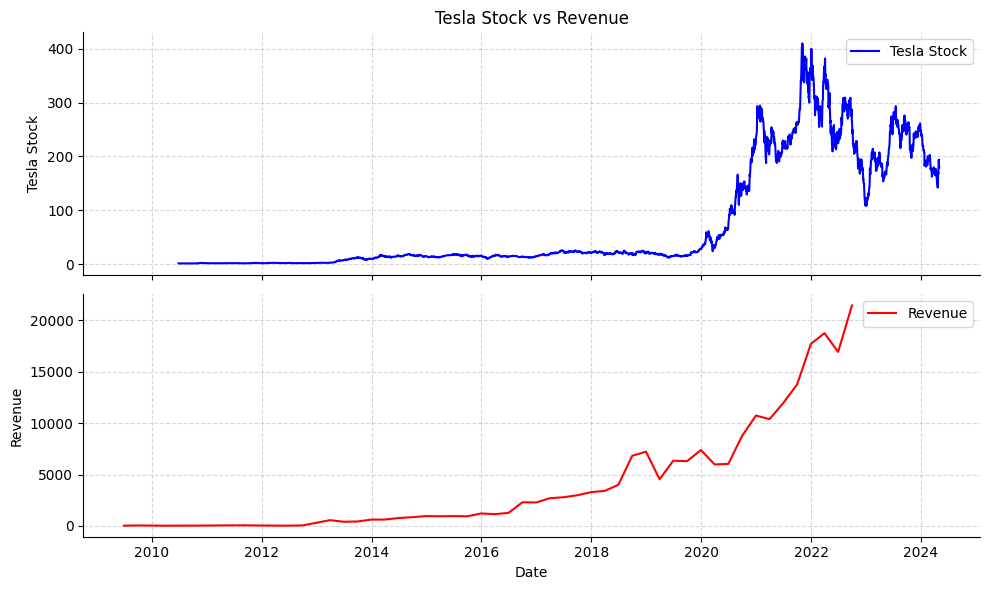

In [30]:
# Converting 'Date' columns to datetime type
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue_data['Date'] = pd.to_datetime(tesla_revenue_data['Date'])

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plotting first subplot
ax1.plot(tesla_data['Date'], tesla_data['Close'], linestyle='-', color='blue', label='Tesla Stock')

ax1.set_ylabel('Tesla Stock')
ax1.set_title('Tesla Stock vs Revenue')

# Plotting second subplot
ax2.plot(tesla_revenue_data['Date'], tesla_revenue_data['Revenue'], linestyle='-', color='red', label='Revenue')

ax2.set_ylabel('Revenue')
ax2.set_xlabel('Date')

# Customize gridlines
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.grid(True, linestyle='--', alpha=0.5)

# Customize spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Show legend
ax1.legend()
ax2.legend()

# Tight layout
plt.tight_layout()

# Showing plot
plt.show()

### Question 6: GameStop Stock and Revenue Dashboard

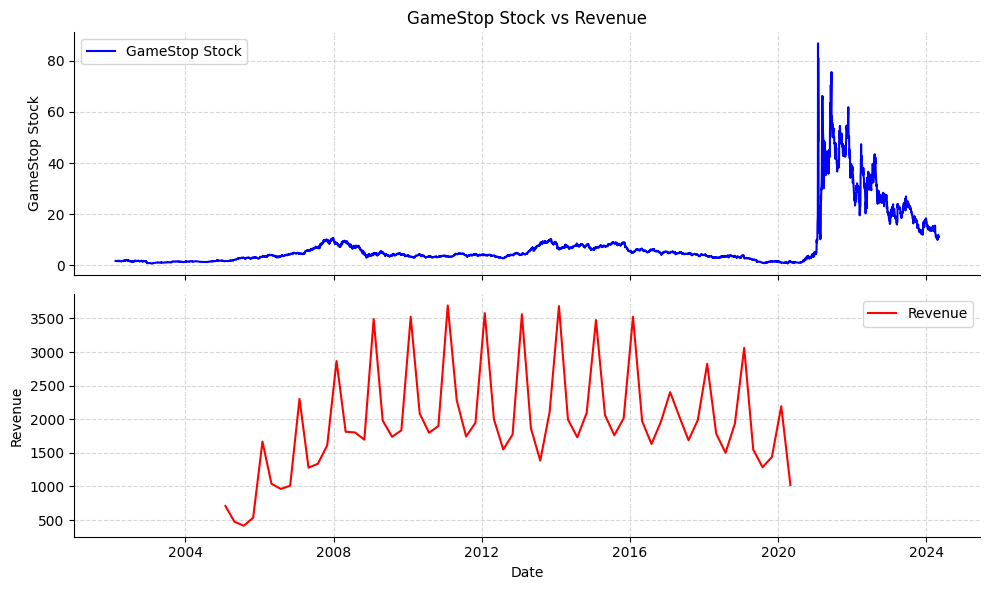

In [31]:
# Converting 'Date' columns to datetime type
GameStop_data['Date'] = pd.to_datetime(GameStop_data['Date'])
GameStop_revenue_data['Date'] = pd.to_datetime(GameStop_revenue_data['Date'])

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Plotting first subplot
ax1.plot(GameStop_data['Date'], GameStop_data['Close'], linestyle='-', color='blue', label='GameStop Stock')

ax1.set_ylabel('GameStop Stock')
ax1.set_title('GameStop Stock vs Revenue')

# Plotting second subplot
ax2.plot(GameStop_revenue_data['Date'], GameStop_revenue_data['Revenue'], linestyle='-', color='red', label='Revenue')

ax2.set_ylabel('Revenue')
ax2.set_xlabel('Date')

# Customize gridlines
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.grid(True, linestyle='--', alpha=0.5)

# Customize spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Show legend
ax1.legend()
ax2.legend()

# Tight layout
plt.tight_layout()

# Showing plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6d3d930b-368a-4833-a009-98a60aa8765f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>